In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import sklearn
from sklearn import linear_model
from sklearn.feature_selection import mutual_info_regression

from sklearn.neighbors import KNeighborsRegressor

from sklearn.neural_network import MLPRegressor

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.feature_selection import SelectFromModel

from sklearn.preprocessing import StandardScaler,MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.svm import SVR

from sklearn.linear_model import RidgeCV
from sklearn.compose import TransformedTargetRegressor

from sklearn.decomposition import TruncatedSVD

In [3]:
# Use pandas to load int o a DataFrame
# Y1.csv doesn't have a header so
# add one when loading the file
X1 = pd.read_csv("X1.csv")
Y1 = pd.read_csv("Y1.csv",header=None,names=['shares'])
# If you prefer to work with numpy arrays:
X1 = X1.values
Y1 = Y1.values
n_samples, n_feats = X1.shape

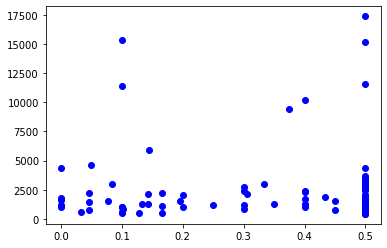

In [4]:
plt.plot(X1[50:150,56],Y1[50:150],'bo')

In [5]:
corr_vec = np.corrcoef(X1,Y1, rowvar=False)[-1, :n_feats]
most_corr = np.argsort(np.abs(corr_vec))
MI = mutual_info_regression(X1,Y1[:,0])
most_MI = np.argsort(np.abs(MI))
print(corr_vec)
print(most_corr)
print(MI)

[ 7.93056036e-03 -5.51693956e-03  4.20821088e-03 -8.19785785e-03
 -9.52402181e-03  4.84827454e-02  9.40460500e-04  4.96259743e-02
  2.43833977e-02 -8.72370544e-03  1.88496809e-02  9.05685812e-03
 -2.29085648e-02 -2.17029463e-02  1.03936407e-02 -1.76252135e-02
 -4.72750742e-02  7.95940415e-03  3.98978038e-02  3.69800097e-02
  3.54394818e-03  3.62882642e-05  4.09031635e-02  3.71300919e-02
  7.12122257e-02  1.08068326e-01  3.32004683e-02  3.93034233e-02
  3.87121511e-02  1.12233924e-03 -1.05325845e-02 -4.70772052e-03
 -4.94923774e-04 -4.14603782e-03  2.04228348e-02  8.89484178e-03
  2.12337369e-02 -7.17960895e-03 -1.71609389e-02 -5.64053239e-02
  8.92261231e-02 -1.68970834e-02  3.93858083e-02  1.06958987e-02
  7.05213539e-03  5.90850743e-03 -3.00432054e-03 -5.17385466e-03
  1.91476463e-02  5.52392163e-03  1.83621599e-02 -3.14893771e-02
 -1.82248346e-02 -2.36275039e-02  2.22861057e-02  9.32417781e-03
  3.83984719e-03  2.82750794e-02]
[21 32  6 29 46 20 56 33  2 31 47  1 49 45 44 37  0 17  

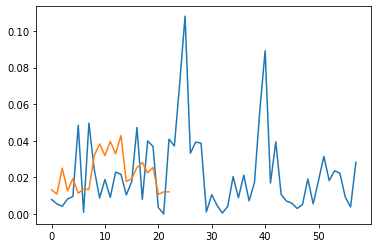

In [6]:
plt.plot(np.abs(corr_vec))
plt.plot(MI[MI>0.01])

In [155]:
X_norm = MinMaxScaler().fit_transform(X1)

X_stand = StandardScaler().fit_transform(X1)

svd = TruncatedSVD(n_components=10)
X_svd = svd.fit_transform(X1)
#X_svd = np.concatenate((X1, arr), axis=1)
X_svd = MinMaxScaler().fit_transform(X_svd)

X_train, X_test, Y_train, Y_test = train_test_split(X_norm, Y1, test_size=0.3, random_state=0)

X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X_stand, Y1, test_size=0.3, random_state=0)

X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X1, Y1, test_size=0.3, random_state=0)

X_trainsvd, X_testsvd, Y_trainsvd, Y_testsvd = train_test_split(X_svd, Y1, test_size=0.3, random_state=0)

(array([10064.,  5108.,  1719.,   832.,   488.,   311.,   245.,   179.,
          121.,   103.]),
 array([1.00000e+00, 1.49090e+03, 2.98080e+03, 4.47070e+03, 5.96060e+03,
        7.45050e+03, 8.94040e+03, 1.04303e+04, 1.19202e+04, 1.34101e+04,
        1.49000e+04]),
 <a list of 10 Patch objects>)

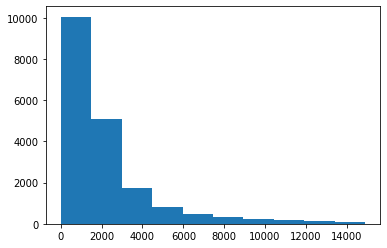

In [133]:
plt.hist(Y1[Y1<15000])

(array([1.000e+00, 1.000e+00, 0.000e+00, 1.000e+01, 4.300e+01, 8.800e+01,
        3.306e+03, 9.878e+03, 4.267e+03, 1.576e+03]),
 array([0.        , 0.41731863, 0.83463725, 1.25195588, 1.66927451,
        2.08659313, 2.50391176, 2.92123039, 3.33854901, 3.75586764,
        4.17318627]),
 <a list of 10 Patch objects>)

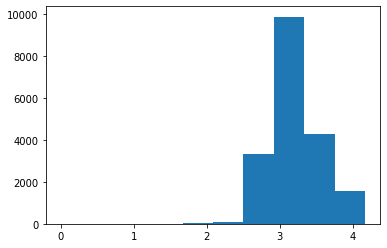

In [137]:
plt.hist(np.log10(Y1[Y1<15000]))

In [7]:
reg = linear_model.LinearRegression()
reg.fit(X_train,Y_train)
model = SelectFromModel(reg, prefit=True)
X_train_linear = model.transform(X_train)
X_test_linear = model.transform(X_test)
print(X_train.shape)
print(X_train_linear.shape)
print(X_test_linear.shape)

(13875, 58)
(13875, 12)
(5947, 12)


In [79]:
def compute_rmse(predict, target):
    if len(target.shape) == 2:
        target = target.squeeze()
    if len(predict.shape) == 2:
        predict = predict.squeeze()
    diff = target - predict
    if len(diff.shape) == 1:
        diff = np.expand_dims(diff, axis=-1)
    rmse = np.sqrt(diff.T@diff / diff.shape[0])
    return float(rmse)

def score_f1 (y_true , y_pred ,th ) :
    return sklearn.metrics.f1_score(y_true>th , y_pred>th )
def score_regression(y_true,y_pred):
    scores=[score_f1(y_true,y_pred,th=th) for th in [500,1400,5000,10000]]
    return np.mean(scores)
def score_regression_vec(y_true,y_pred):
    scores=[score_f1(y_true,y_pred,th=th) for th in [500,1400,5000,10000]]
    return scores



In [146]:
linreg = linear_model.LinearRegression()
linreg.fit(X_train,Y_train)
predict = linreg.predict(X_test)

print(score_regression_vec(Y_test,predict))
print(score_regression(Y_test,predict))
print(compute_rmse(predict, Y_test))


linreg2 = linear_model.LinearRegression()
linreg2.fit(X_train1,Y_train1)
predict2 = linreg2.predict(X_test1)


print(score_regression_vec(Y_test1,predict2))
print(score_regression(Y_test1,predict2))
print(compute_rmse(predict2, Y_test1))


linreg3 = linear_model.LinearRegression()
linreg3.fit(X_train2,Y_train2)
predict3 = linreg3.predict(X_test2)

print(score_regression_vec(Y_test2,predict3))
print(score_regression(Y_test2,predict3))
print(compute_rmse(predict3, Y_test2))

[0.9826302729528535, 0.6600832837596667, 0.2784090909090909, 0.011976047904191616]
0.4832746738814507
81767706.8434419
[0.9841947885519009, 0.6615402815568437, 0.27487061529614726, 0.01775147928994083]
0.48458929117370825
82232919.85289308
[0.9841947885519009, 0.6615439177207707, 0.2708933717579251, 0.01775147928994083]
0.4835958893301344
86738047.95141332


In [165]:
scores = []
RMSE = []
for i in range (X1.shape[1]+1):
    linreg2 = linear_model.LinearRegression()
    linreg2.fit(X_train1[:,most_MI[-i:]],Y_train1)
    predict2 = linreg2.predict(X_test1[:,most_MI[-i:]])
    scores = np.append(scores,score_regression(Y_test1,predict2))
    print("i: " + str(i) + " Score " + str(score_regression(Y_test1,predict2)))

i: 0 Score 0.48462882952458514
i: 1 Score 0.4166156523422179
i: 2 Score 0.41719819519190954
i: 3 Score 0.4250147494278735
i: 4 Score 0.4249654886029714
i: 5 Score 0.47667642324146564
i: 6 Score 0.4783077770065718
i: 7 Score 0.47501037025803067
i: 8 Score 0.4749160337389394
i: 9 Score 0.4790150685473111
i: 10 Score 0.48047389164878535
i: 11 Score 0.4805518948075684
i: 12 Score 0.48087817974227987
i: 13 Score 0.48173917822090473
i: 14 Score 0.48100070807141565
i: 15 Score 0.48091623468864103
i: 16 Score 0.48115803004643803
i: 17 Score 0.4812118393809707
i: 18 Score 0.48160056090878606
i: 19 Score 0.4806967784119237
i: 20 Score 0.4808559016112954
i: 21 Score 0.48238384584977256
i: 22 Score 0.48247849876837434
i: 23 Score 0.4819963031670236
i: 24 Score 0.4816429059169503
i: 25 Score 0.4818914214834305
i: 26 Score 0.48334726132435896
i: 27 Score 0.48334726132435896
i: 28 Score 0.4832683650206296
i: 29 Score 0.4825351680032603
i: 30 Score 0.4805507807262089
i: 31 Score 0.4802982925421729
i: 

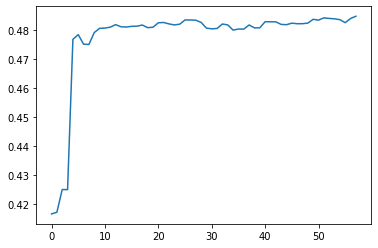

In [164]:
plt.plot(scores[1:])


In [197]:
linreg = linear_model.LinearRegression()
linreg.fit(X_train[:,most_MI[-10:]],Y_train)
predict = linreg.predict(X_test[:,most_MI[-10:]])

print(score_regression_vec(Y_test,predict))
print(score_regression(Y_test,predict))
print(compute_rmse(predict, Y_test))


linreg2 = linear_model.LinearRegression()
linreg2.fit(X_train1[:,most_MI[-10:]],Y_train1)
predict2 = linreg2.predict(X_test1[:,most_MI[-10:]])


print(score_regression_vec(Y_test1,predict2))
print(score_regression(Y_test1,predict2))
print(compute_rmse(predict2, Y_test1))


linreg3 = linear_model.LinearRegression()
linreg3.fit(X_train2[:,most_MI[-10:]],Y_train2)
predict3 = linreg3.predict(X_test2[:,most_MI[-10:]])

print(score_regression_vec(Y_test2,predict3))
print(score_regression(Y_test2,predict3))
print(compute_rmse(predict3, Y_test2))

[0.9852401672212269, 0.6514837819185645, 0.27912932138284247, 0.006042296072507552]
0.48047389164878535
12428.738548409734
[0.9852401672212269, 0.6514837819185645, 0.27912932138284247, 0.006042296072507552]
0.48047389164878535
12428.738548409734
[0.9852401672212269, 0.6514837819185645, 0.27912932138284247, 0.006042296072507552]
0.48047389164878535
12428.738548409843


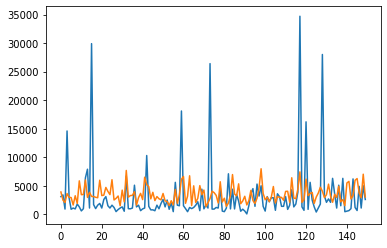

In [198]:
plt.plot(Y_test[:150])
plt.plot(predict[:150])

In [156]:
linreg = linear_model.LinearRegression()
linreg.fit(X_trainsvd,Y_trainsvd)
predict = linreg.predict(X_testsvd)

print(score_regression_vec(Y_testsvd,predict))
print(score_regression(Y_testsvd,predict))
print(compute_rmse(predict, Y_testsvd))



[0.9841974886819851, 0.6494524495677234, 0.2620320855614973, 0.005988023952095808]
0.4754175119408254
12436.861339855815


In [190]:
def model_selection_KNN(x_train,y_train):
    best_score=np.inf
    best_k = 0
    for k in (1,2,3,4,5,6,7,8,9,10,12,14,16,18,20,25,30):
        knn = KNeighborsRegressor(n_neighbors=k)
        score = cross_val_score(knn, x_train, y_train, cv=5)
        print(score.mean())
        if np.abs(score.mean()) < best_score:
            best_score = np.abs(score.mean())
            best_k = k
    return best_k,best_score
best_k,best_score = model_selection_KNN(X_train[:,most_MI[-10:]],Y_train)
print(best_k,best_score)

-1.7985975239258019
-1.0944572548791769
-0.5766918887606575
-0.3566808826114406
-0.38224144173270524
-0.2684916133170854
-0.21313662659612911
-0.17017167223480198
-0.16224728723602197
-0.1416680167946398
-0.11671925284583802
-0.08898617796566714
-0.07981893180768798
-0.06747348502848793
-0.05643348380193558
-0.04012162986801178
-0.029742383042784138
30 0.029742383042784138


In [202]:
knn = KNeighborsRegressor(n_neighbors=6)
knn.fit(X_train[:,most_MI[-10:]],Y_train)
predictknn = knn.predict(X_test[:,most_MI[-10:]])
print(score_regression_vec(Y_test,predictknn))
print(score_regression(Y_test,predictknn))

[0.985586353944563, 0.643855678338437, 0.2059973924380704, 0.08896797153024913]
0.4811018490628299


[0.985586353944563, 0.643855678338437, 0.2059973924380704, 0.08896797153024913]


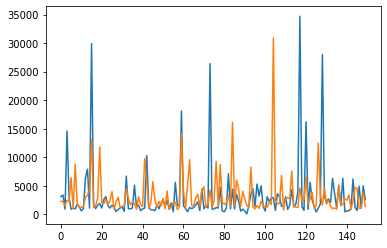

In [199]:
plt.plot(Y_test[:150])
plt.plot(predictknn[:150])


In [205]:
knn = KNeighborsRegressor(n_neighbors=6)
knn.fit(X_train1[:,most_MI[-10:]],Y_train1)
predictknn1 = knn.predict(X_test1[:,most_MI[-10:]])
print(score_regression_vec(Y_test1,predictknn1))
print(score_regression(Y_test1,predictknn1))

[0.9860187553282183, 0.6473196291817815, 0.21798029556650247, 0.08727272727272728]
0.4846478518373074


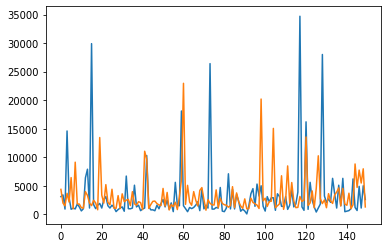

In [206]:
plt.plot(Y_test1[:150])
plt.plot(predictknn1[:150])


In [207]:
knn = KNeighborsRegressor(n_neighbors=6)
knn.fit(X_train2[:,most_MI[-10:]],Y_train2)
predictknn2 = knn.predict(X_test2[:,most_MI[-10:]])
print(score_regression_vec(Y_test2,predictknn2))
print(score_regression(Y_test2,predictknn2))

[0.9859323045442919, 0.6372718795790595, 0.22403733955659277, 0.10372771474878444]
0.4877423096071822


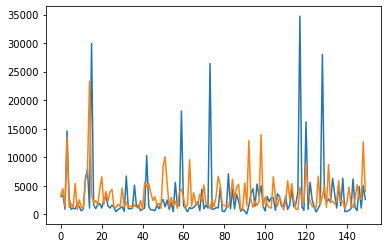

In [208]:
plt.plot(Y_test2[:150])
plt.plot(predictknn2[:150])


In [209]:
def model_selection_MLP(x_train,y_train):
    best_score=np.inf
    best_lr = 0
    for lr in (0.5e-2,0.75e-2,1e-2,1.5e-2,2e-2):
        mlp = MLPRegressor(learning_rate_init=lr,max_iter=500)
        score = cross_val_score(mlp, x_train, y_train, cv=5)
        print(score.mean())
        if np.abs(score.mean()) < best_score:
            best_score = np.abs(score.mean())
            best_lr = lr
    return best_lr,best_score
best_lr,best_score = model_selection_MLP(X_train[:,most_MI[-10:]],np.ravel(Y_train))
print(best_lr,best_score)

C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.ma

0.015143022797848227


C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.ma

0.01559547990555894


C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.015254705097587262


C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.014600863769493854
0.014804881180250029
0.015 0.014600863769493854


In [218]:
best_lr = 0.0075

mlp = MLPRegressor(learning_rate_init=best_lr,max_iter=1000)
mlp.fit(X_train[:,most_MI[-10:]],np.ravel(Y_train))
predictmlpno = mlp.predict(X_test[:,most_MI[-10:]])
print(score_regression_vec(Y_test,predictmlpno))
print(score_regression(Y_test,predictmlpno))

[0.9860187553282183, 0.6504766227871085, 0.23941798941798942, 0.0060790273556231]
0.47049809872223475


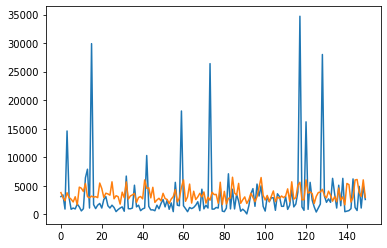

In [219]:
plt.plot(Y_test[:150])
plt.plot(predictmlpno[:150])

In [220]:
mlp = MLPRegressor(learning_rate_init=best_lr,max_iter=1000)
mlp.fit(X_train1[:,most_MI[-10:]],np.ravel(Y_train1))
predictmlpno = mlp.predict(X_test1[:,most_MI[-10:]])
print(score_regression_vec(Y_test1,predictmlpno))
print(score_regression(Y_test1,predictmlpno))

[0.9847152250021347, 0.6545064377682404, 0.28793309438470727, 0.0633245382585752]
0.4976198238534144


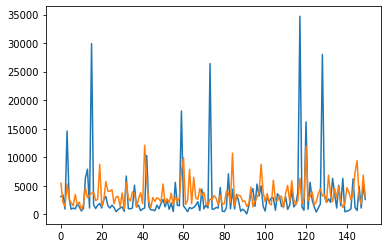

In [221]:
plt.plot(Y_test[:150])
plt.plot(predictmlpno[:150])

In [222]:
mlp = MLPRegressor(learning_rate_init=0.015,max_iter=1000)
mlp.fit(X_train2[:,most_MI[-10:]],np.ravel(Y_train2))
predictmlpno = mlp.predict(X_test2[:,most_MI[-10:]])
print(score_regression_vec(Y_test2,predictmlpno))
print(score_regression(Y_test2,predictmlpno))

[0.9849803720771462, 0.6500798904359736, 0.2717469446441409, 0.0]
0.4767018017893152


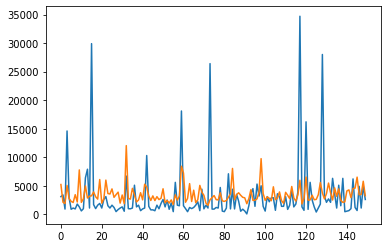

In [223]:
plt.plot(Y_test[:150])
plt.plot(predictmlpno[:150])

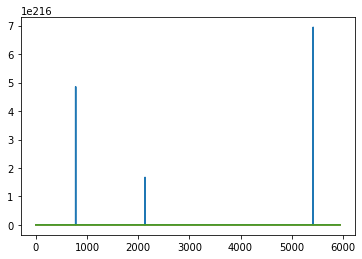

In [85]:
#plt.plot(Y_test[:150])
plt.plot(predicte[:])
plt.plot(predictknn[:])
plt.plot(predict2[:])

In [224]:
def model_selection_rbf(x_train,y_train):
    best_score=np.inf
    best_parameters = (0,0)
    for c in (0.2,0.5,1,2,3,5):
        for eps in (0.1,0.2,0.5,1.,5.,10.,20.):
            svr = SVR(C=c, epsilon=eps)
            score = cross_val_score(svr, x_train, y_train, cv=5)
            print(score.mean())
            if np.abs(score.mean()) < best_score:
                best_score = np.abs(score.mean())
                best_parameters = (c,eps)
    return best_parameters, best_score
best_param,best_score = model_selection_rbf(X_train[:,most_MI[-10:]],np.ravel(Y_train))

C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:

-0.04659928837793483


C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:

-0.04659836323090509


C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:

-0.04659920061904508


C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:

-0.0465942083250452


C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:

-0.046593981058687325


C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:

-0.0466103371521299


C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:

-0.04670267163047992


C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:

-0.0454793194265803


C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:

-0.04547801108156824


C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:

-0.04547214102635846


C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:

-0.04547870273510472


C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:

-0.045499826736110596


C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:

-0.045501115484416


C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:

-0.04559542335417706


C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:

-0.044173150174367445


C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:

-0.04417473005642125


C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:

-0.044176781764958095


C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:

-0.0441723869534715


C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:

-0.04415746866447936


C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:

-0.04414030973201881


C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:

-0.04409307881551161


C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:

-0.042167467234053735


C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:

-0.04216765463145231


C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:

-0.04216909233212438


C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:

-0.04215865855096799


C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:

-0.04213065886110869


C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:

-0.04213952374950072


C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:

-0.04202153068351313


C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:

-0.040549391538903246


C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:

-0.04054854156291645


C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:

-0.040548022601588095


C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:

-0.04054477956013765


C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:

-0.040548042188385744


C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:

-0.04053887316930567


C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:

-0.04058456167681372


C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:

-0.038636790212185225


C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:

-0.038636471856350864


C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:

-0.038637715042023


C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:

-0.03863550331990271


C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:

-0.03864776770325995


C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:

-0.03863150886714602


C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:

-0.03862088574165372


In [226]:
svr = SVR(C=best_param[0], epsilon=best_param[1])
svr.fit(X_train[:,most_MI[-10:]],np.ravel(Y_train))
predictsvr= svr.predict(X_test[:,most_MI[-10:]])

C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [227]:
print(score_regression_vec(Y_test,predictsvr))
print(score_regression(Y_test,predictsvr))

[0.9860187553282183, 0.6404388714733542, 0.0, 0.0]
0.4066144067003931


C:\Users\bapt9_000\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


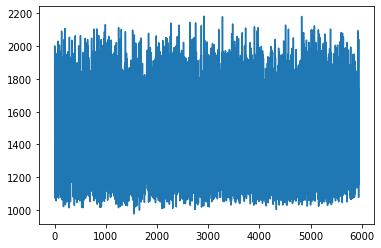

In [228]:
plt.plot(predictsvr[:])